In [1]:
import pandas as pd
import os 
from datetime import datetime,timedelta
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D


path = "1"
df1 = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        try:
            cur_pd = pd.read_csv(path + '\\' + file)
        except:
            print(file)
            raise
        if 'ts' in cur_pd.columns:
            cur_pd['ts'] = pd.to_datetime(cur_pd['ts'], format='%y-%m-%d %H:%M:%S')
        if df1 is None:
            df1 = cur_pd
        else:
            df1 = pd.concat([df1,cur_pd])

path = "2"
df2 = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        try:
            cur_pd = pd.read_csv(path + '\\' + file)
        except:
            print(file)
            raise
        if 'ts' in cur_pd.columns:
            cur_pd['ts'] = pd.to_datetime(cur_pd['ts'], format='%y-%m-%d %H:%M:%S')
        if df2 is None:
            df2 = cur_pd
        else:
            df2 = pd.concat([df2,cur_pd])

path = "3"
df3 = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        try:
            cur_pd = pd.read_csv(path + '\\' + file)
        except:
            print(file)
            raise
        if 'ts' in cur_pd.columns:
            cur_pd['ts'] = pd.to_datetime(cur_pd['ts'], format='%y-%m-%d %H:%M:%S')
        if df3 is None:
            df3 = cur_pd
        else:
            df3 = pd.concat([df3,cur_pd])

dict_id_sType = {
    2:"SHT45",
    3:"CWT",
    7:"SHT45",
    9:"CWT",
    11:"Roxo",
    12:"Roxo",
    14:"Roxo",
    19:"Verde",
    20:"Verde",
    21:"Verde",
    23:"THC",
    24:"THC",
    26:"THC",
    27:"THC",
    28:"EC5",
    30:"PCB capacitivo"
}

In [3]:
date_init= pd.to_datetime('24-01-02 13:00:00', format='%y-%m-%d %H:%M:%S')

df1 = df1[df1['ts'] > date_init]
df2 = df2[df2['ts'] > date_init]
df3 = df3[df3['ts'] > date_init]

In [19]:
def plot(id,algs = [True,True],calc_strategies_diff = False,date_init = None,ytext = 2,unit="%"):
    column = "humidity"
    plt.figure(figsize=(20,6))
    plt.title("Sensor: " + dict_id_sType[id] + ", ID: " + str(id))
    plt.xlabel("i-ésima medição")
    plt.ylabel(f"Umidade ({unit})")

    if algs[0]:
        df = df1
        if date_init is not None:
            try: 
                date_init = pd.to_datetime(date_init, format='%y-%m-%d')
                df = df[df['ts']>date_init]
            except:
                pass
        plt.scatter(x = [i for i in range(df[df['id'] == id].shape[0])], y = df[df['id'] == id].sort_values('ts',axis='index',ascending=True)[column],color='blue')
    if algs[1]:
        df = df2
        if date_init is not None:
            try: 
                date_init = pd.to_datetime(date_init, format='%y-%m-%d')
                df = df[df['ts']>date_init]
            except:
                df = df2
        plt.scatter(x = [i for i in range(df[df['id'] == id].shape[0])], y = df[df['id'] == id].sort_values('ts',axis='index',ascending=True)[column],color='orange')
    df = df2[df2['id'] == id].sort_values('ts',axis='index',ascending=True)[[column,'ts']]
    if date_init is not None:
        try: 
            date_init = pd.to_datetime(date_init, format='%y-%m-%d')
            df = df[df['ts']>date_init]
        except:
            df = df2[df2['id'] == id].sort_values('ts',axis='index',ascending=True)[[column,'ts']]
    initial_datetime =  df.iloc[0]
    aux_datetime = initial_datetime['ts']
    weekly_marks = []

    #Week to index mapping
    for i in range(1,df.shape[0]):
        diff = df['ts'].iloc[i] - aux_datetime
        if diff > timedelta(weeks=1):
            weekly_marks.append([i,df.iloc[i]])
            aux_datetime = df['ts'].iloc[i]


    for mark in weekly_marks:
        plt.annotate(
            f'{mark[1]['ts'].strftime('%d/%m/%y')}',  # Comment text
            xy=(mark[0], mark[1]['humidity']),    # Point to annotate
            xytext=(mark[0] + 1, mark[1]['humidity'] + ytext),  # Text position
            arrowprops=dict(facecolor='black', arrowstyle='->')  # Arrow style
        )


    #Deviation between strategies 1 and 2 calculation
    legend_text = None
    if calc_strategies_diff:
        diff_sum = 0
        total = 0
        df_st_1 = df1[df1['id'] == id].sort_values('ts',axis='index',ascending=True)
        df_st_2 = df2[df2['id'] == id].sort_values('ts',axis='index',ascending=True)

        for i in range(df_st_1.shape[0]):
            if i < df_st_2.shape[0]:
                diff_sum += df_st_2['humidity'].iloc[i] - df_st_1['humidity'].iloc[i]
                total += 1
            else:
                break
        legend_text = Line2D([0], [0], linestyle="none", label=f'Estratégia 2 - Estratégia 1 (Média) : {diff_sum/total}')
    
    #Legend
    if calc_strategies_diff:
        plt.legend(handles=plt.gca().get_legend_handles_labels()[0] + [legend_text], title="Legend")
    else:
        plt.legend()

## Face Esquerda

### Coluna A

C:\Users\Fabio\AppData\Local\Temp\ipykernel_18448\3308453940.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Fabio\AppData\Local\Temp\ipykernel_18448\3308453940.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Fabio\AppData\Local\Temp\ipykernel_18448\3308453940.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


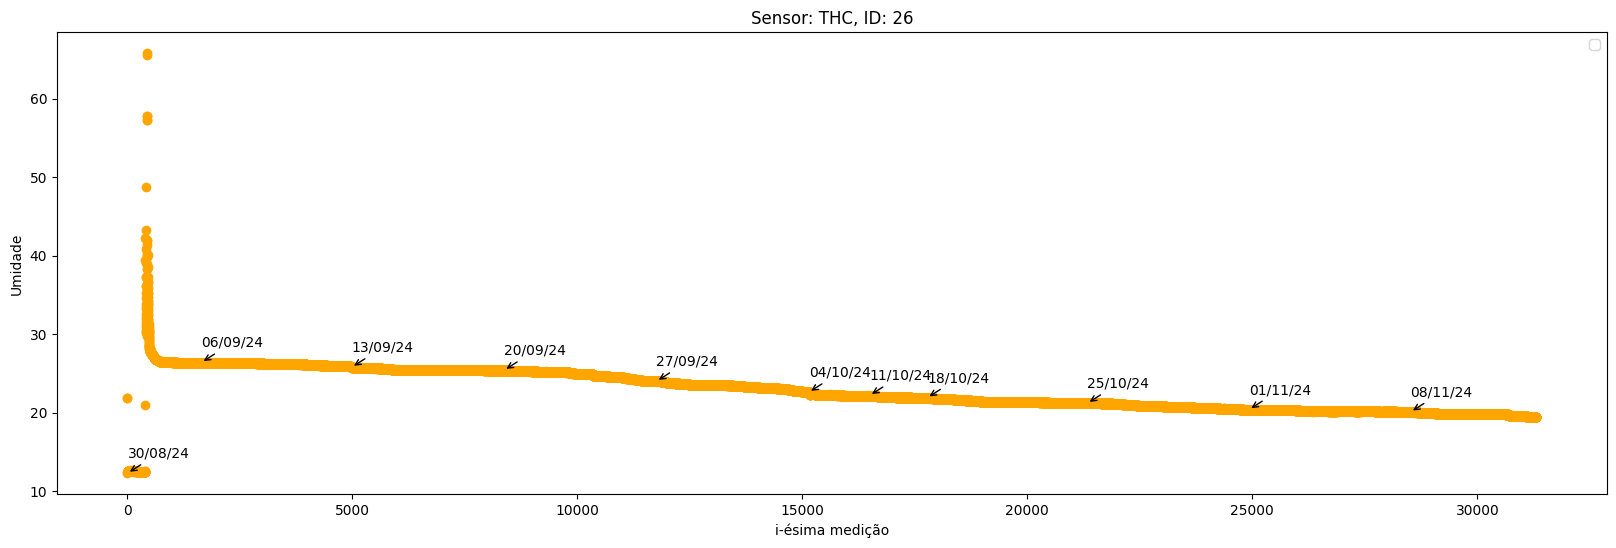

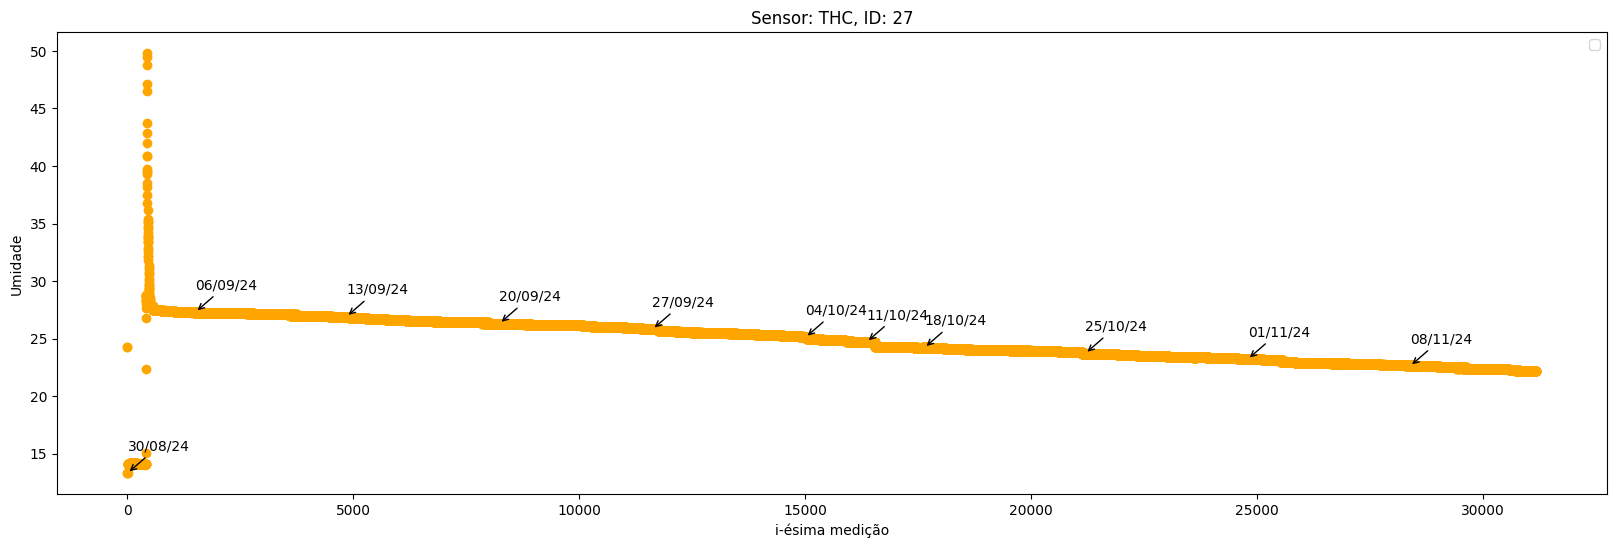

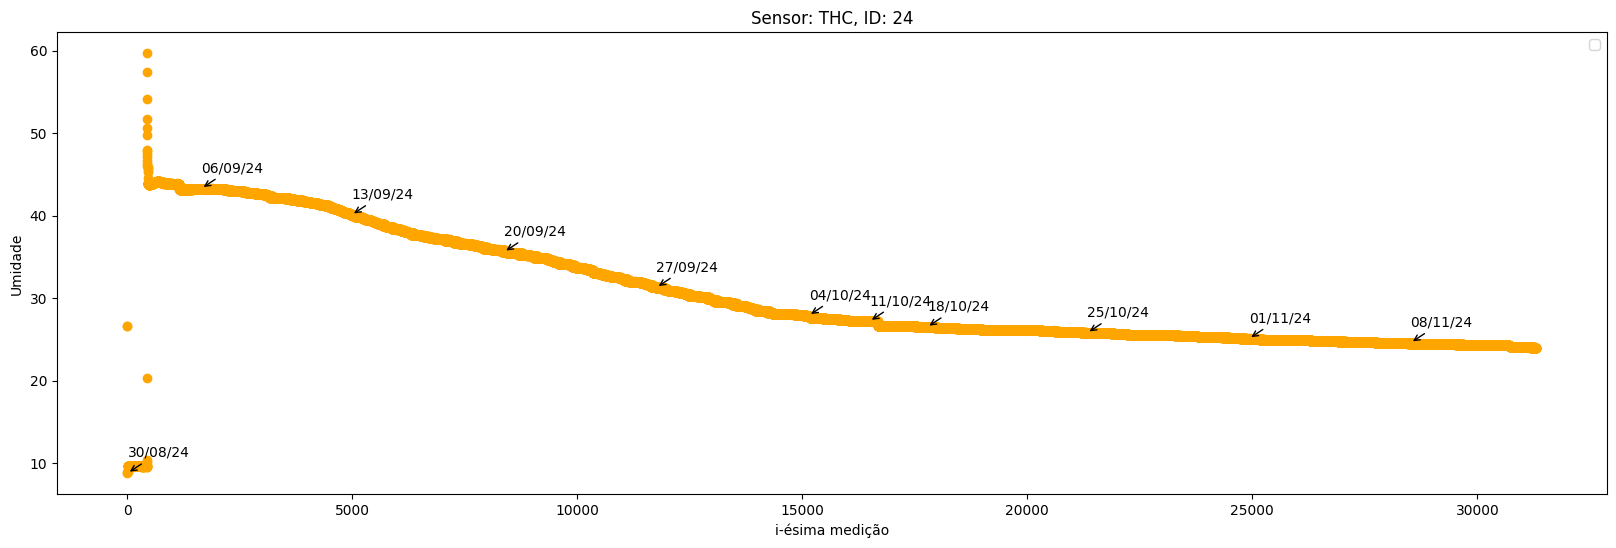

In [18]:
plot(26,[False,True])
plot(27,[False,True])
plot(24,[False,True])

### Coluna B

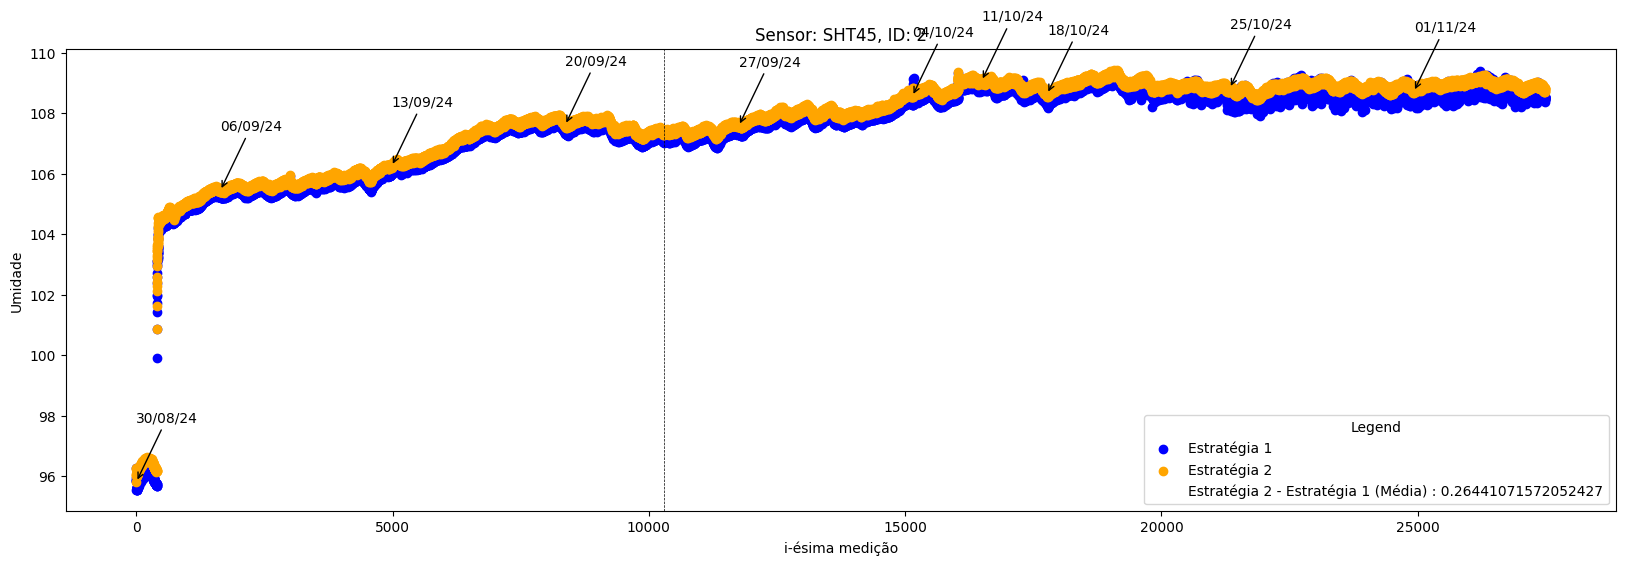

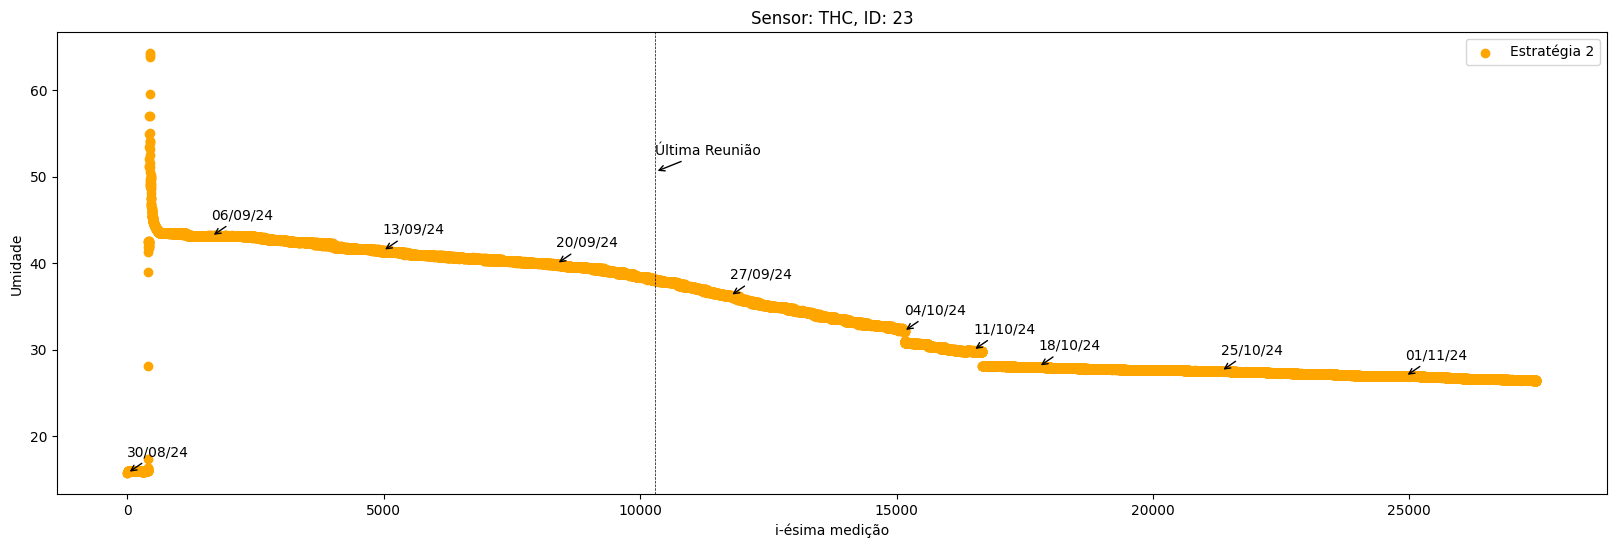

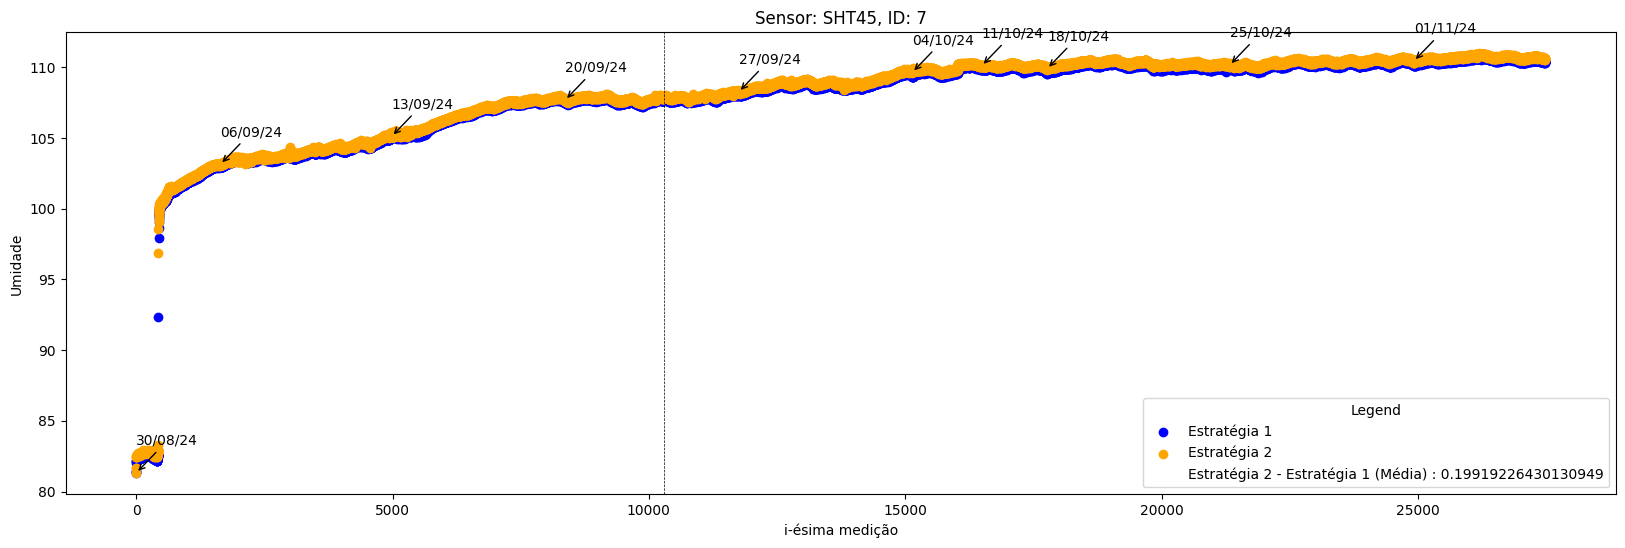

In [6]:
plot(2,[True,True],True)
plot(23,[False,True])
plot(7,[True,True],True)


## Face Direita

### Coluna A

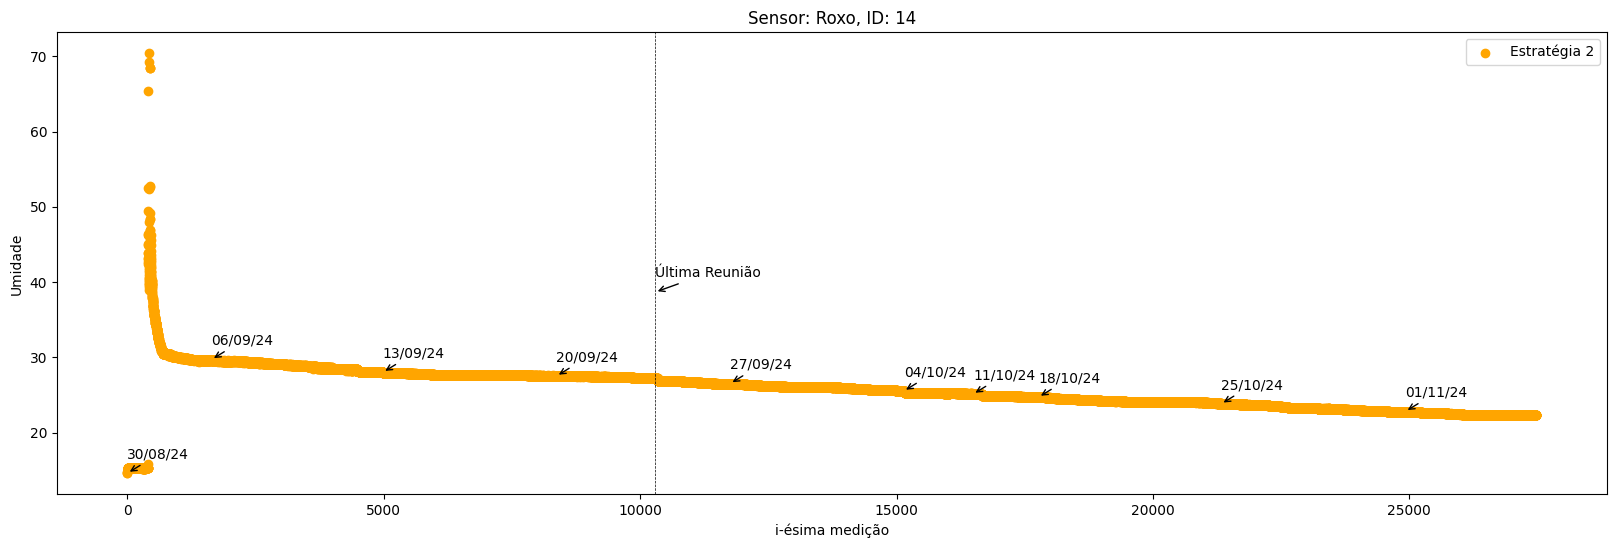

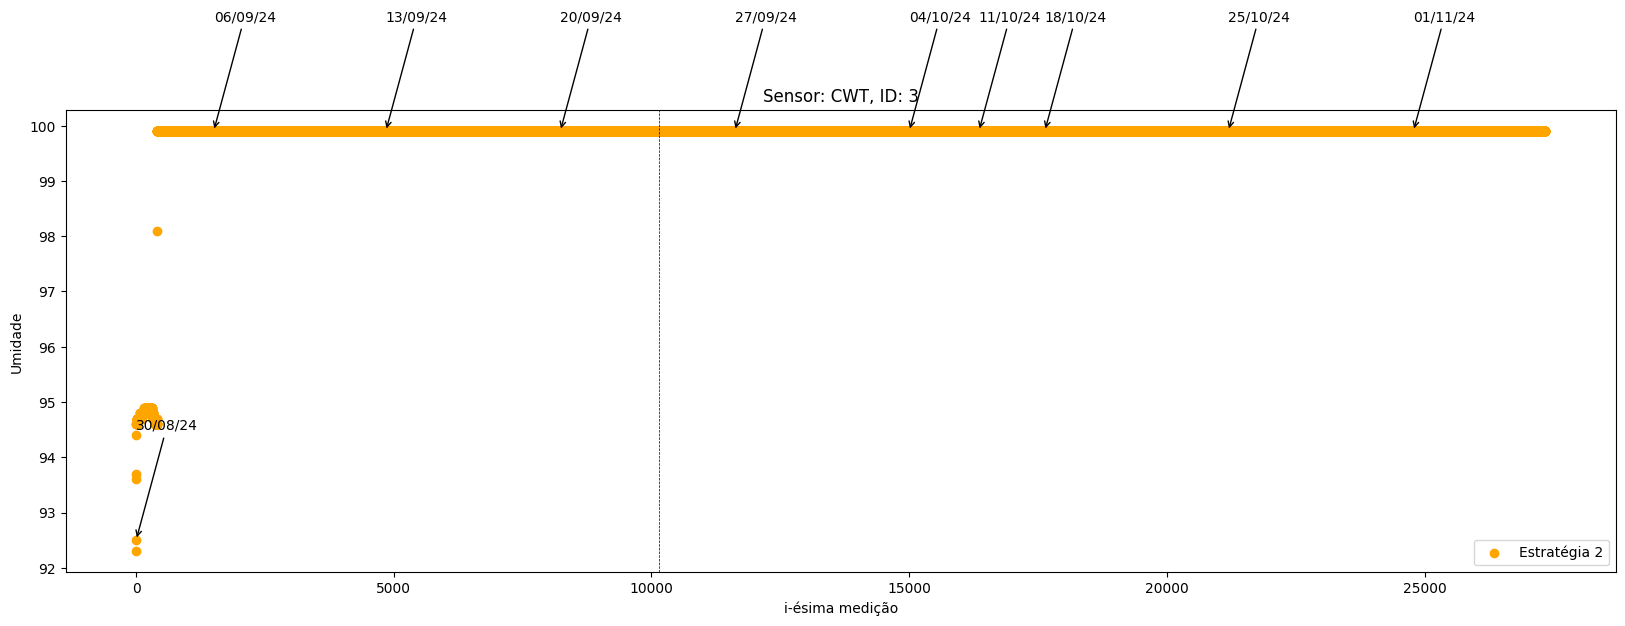

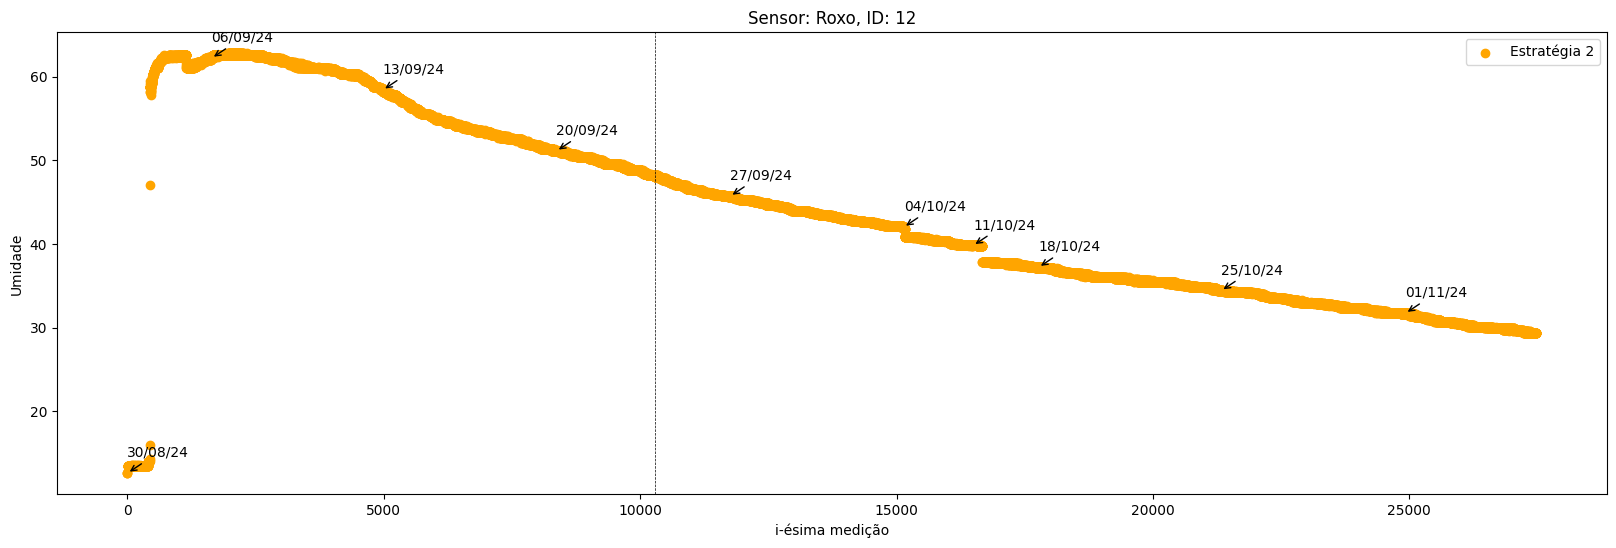

In [7]:
plot(14,[False,True])
plot(3,[False,True])
plot(12,[False,True])

### Coluna B

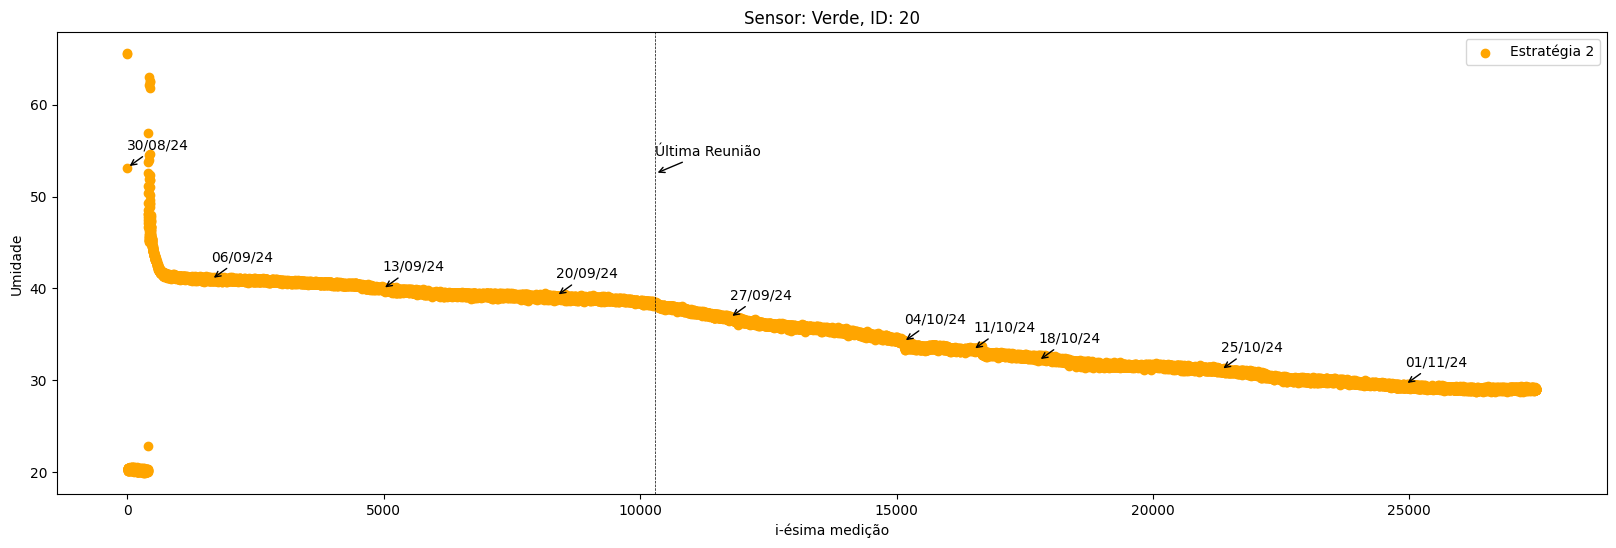

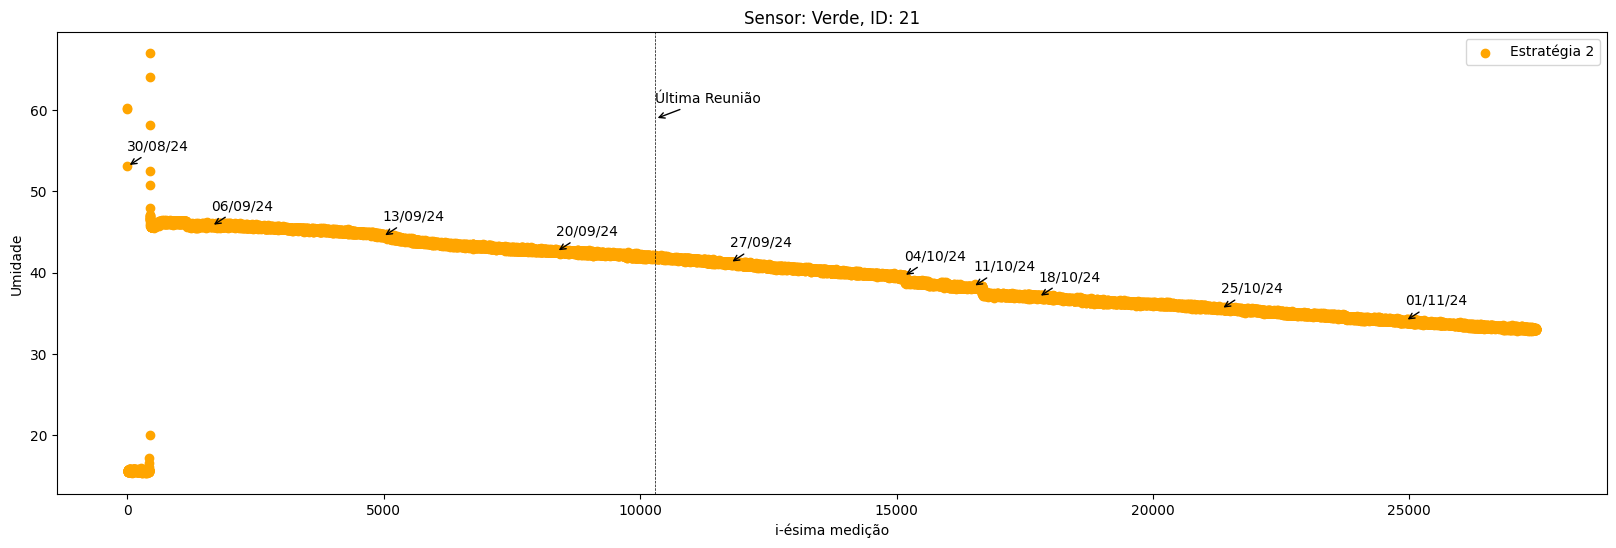

In [8]:
#plot(19,[False,True])
plot(20,[False,True])
plot(21,[False,True])

## Trás

### Coluna A

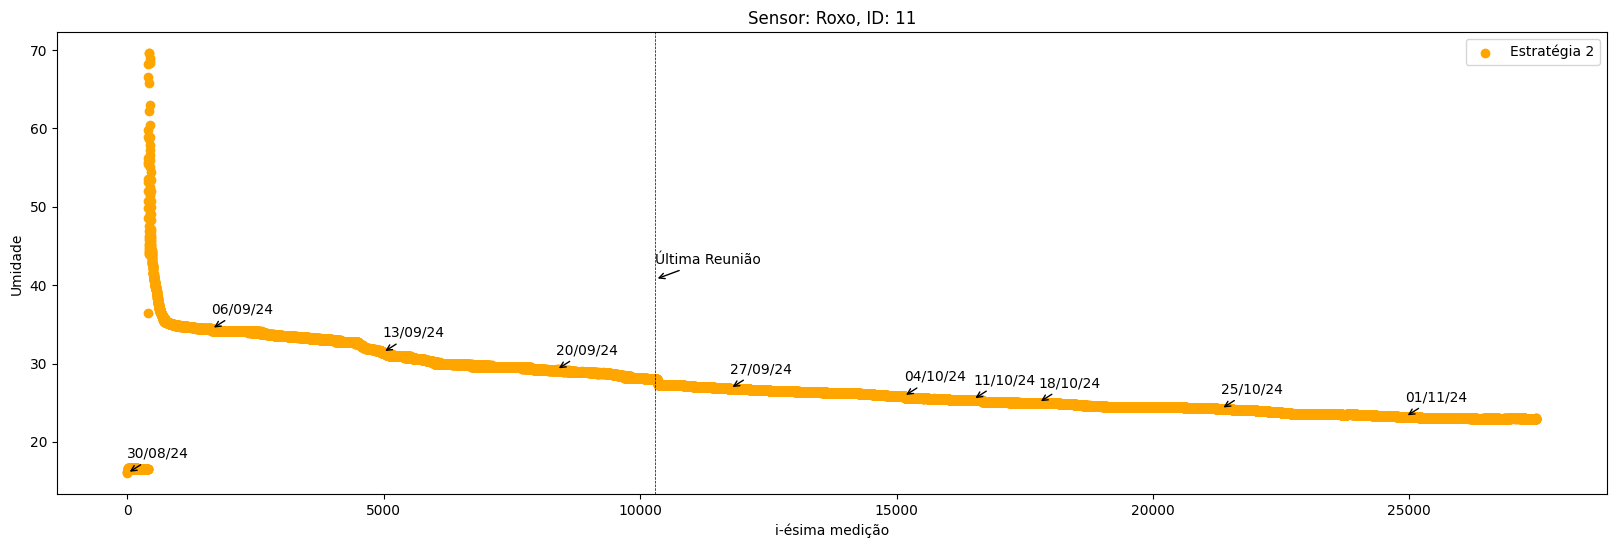

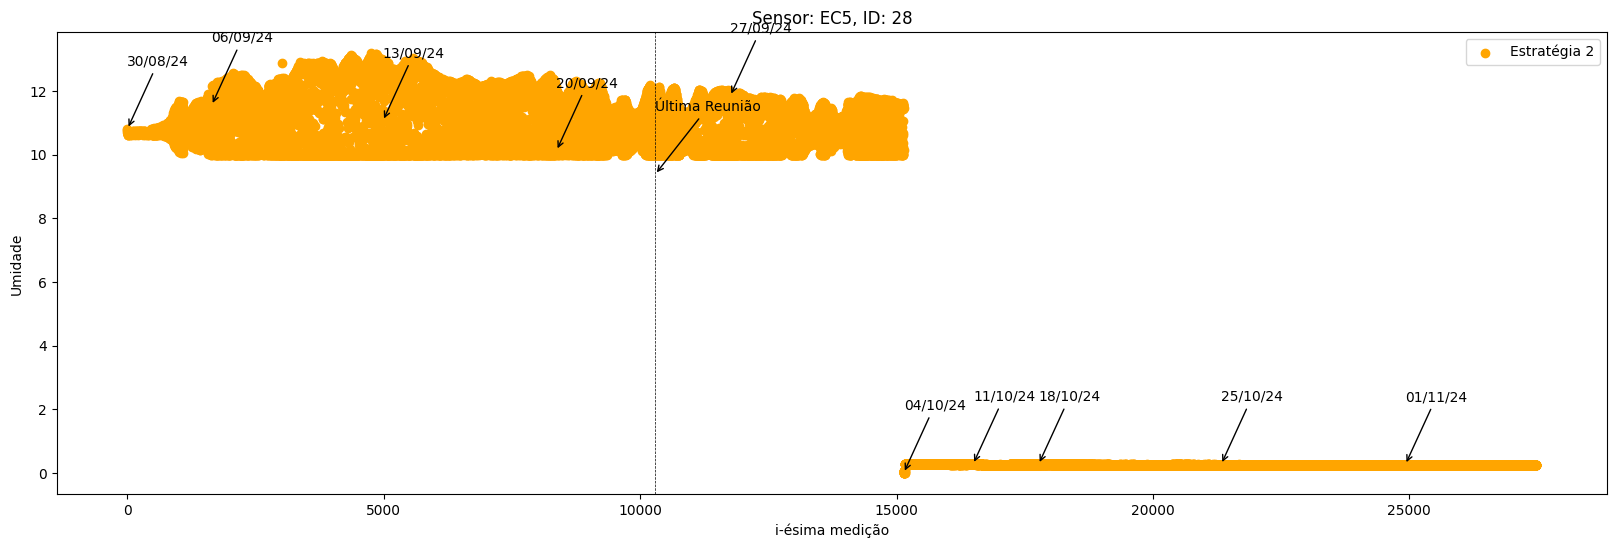

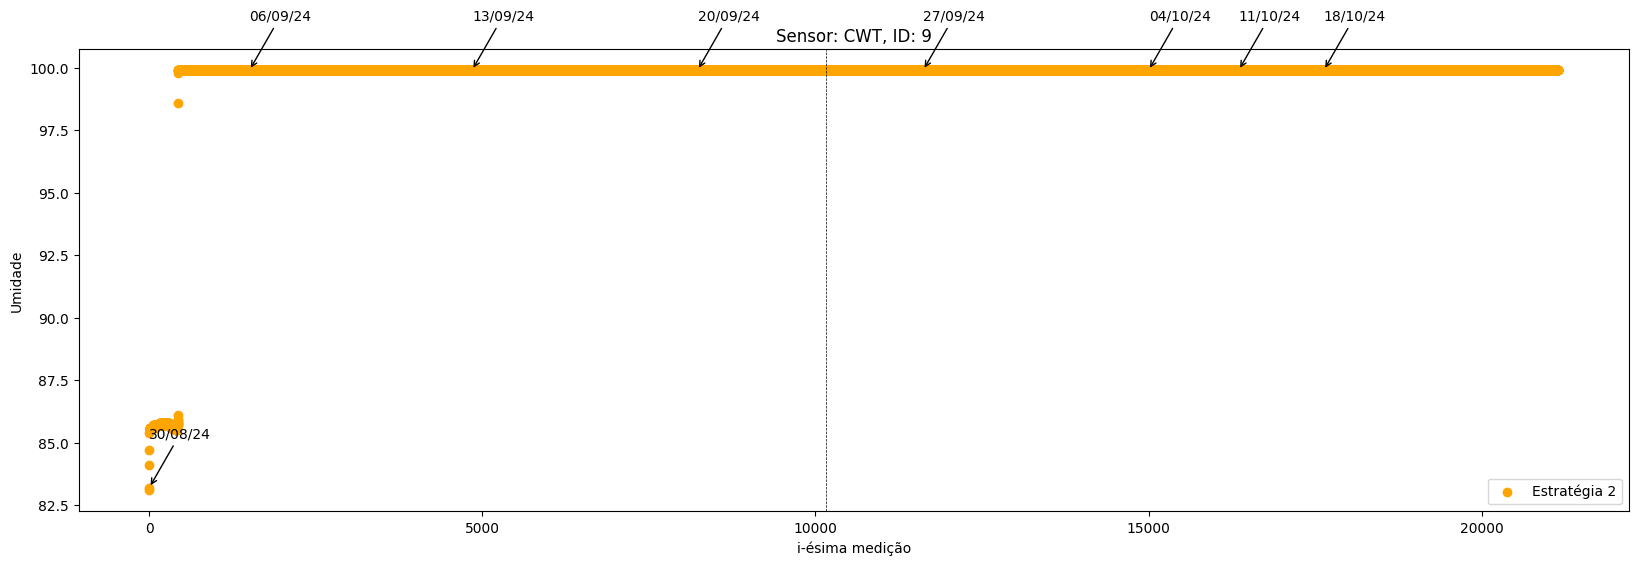

In [9]:
plot(11,[False,True])
plot(28,[False,True])
plot(9,[False,True])


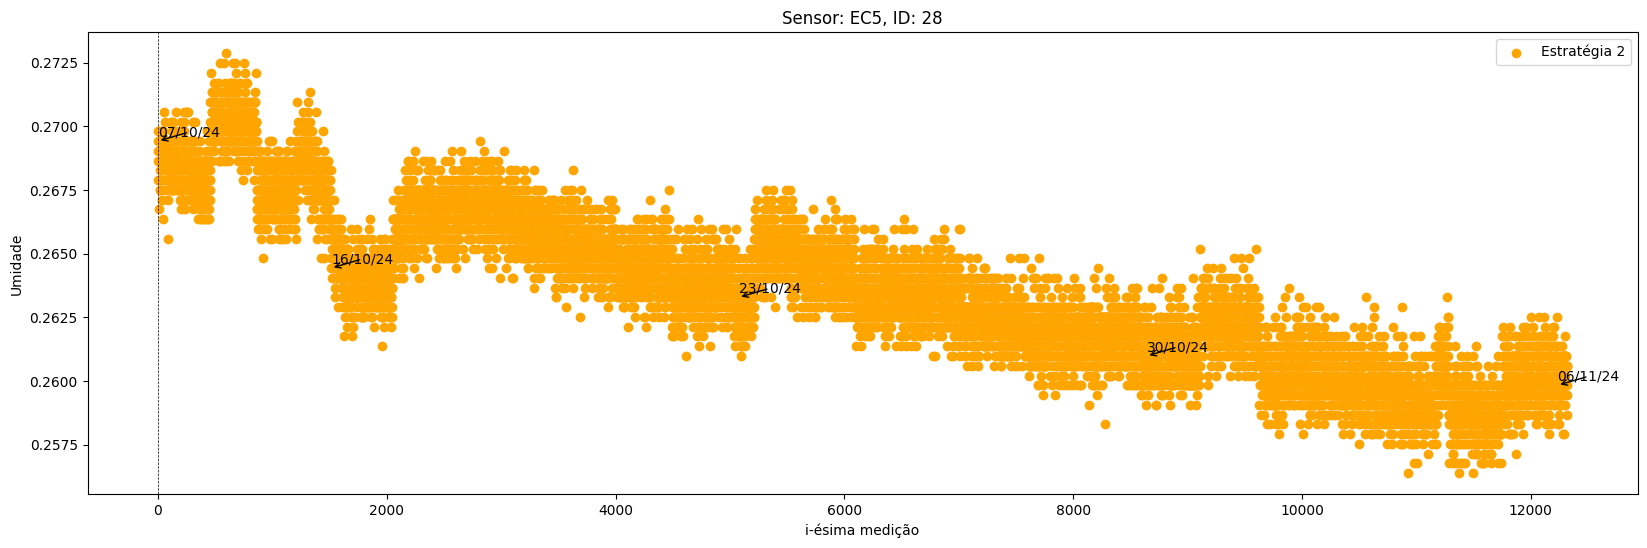

In [31]:
plot(28,[False,True],date_init="24-10-05",ytext = 0.0002)

### Coluna B

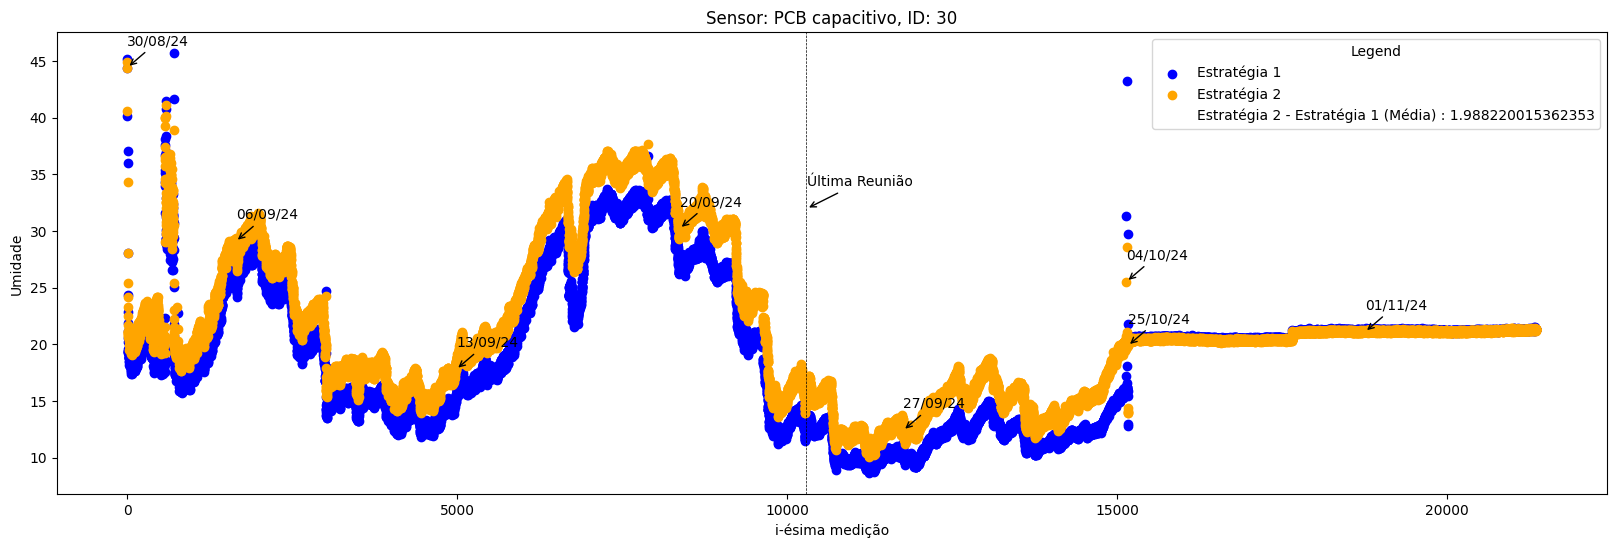

In [44]:
plot(30,[True,True],True)

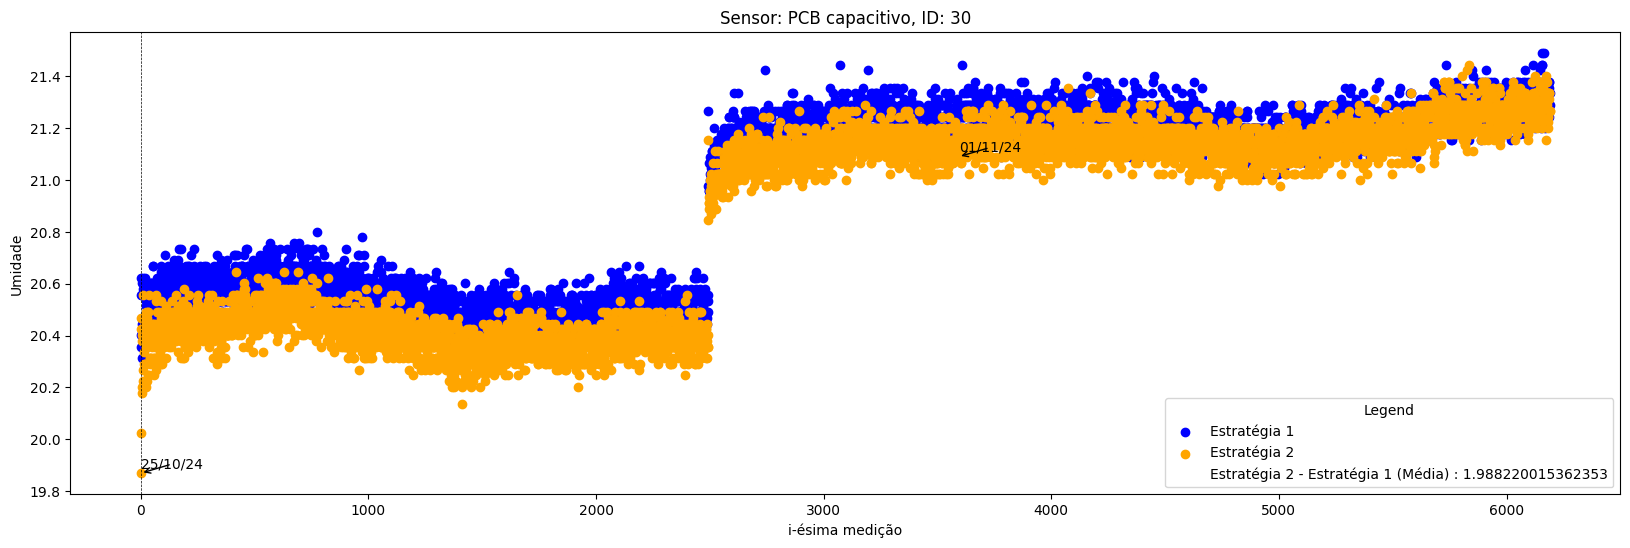

In [43]:
plot(30,[True,True],True,date_init="24-10-05",ytext = 0.02)

# Inclinação

Cálculo: Diferença entre uma mensuração do dia i e i-1

In [11]:
def plot_diff(id,algs = [True,True],calc_strategies_diff = False):
    column = "humidity"
    plt.figure(figsize=(20,6))
    plt.title("Sensor: " + dict_id_sType[id] + ", ID: " + str(id))
    #plt.xlabel("i-ésima diferença")
    #plt.ylabel("Diferença de Umidade")

    df = df2[df2['id'] == id].sort_values('ts',axis='index',ascending=True)
    aux_datetime = datetime.combine(df['ts'].iloc[0].date(), datetime.min.time())
    aux_humidity = df['humidity'].iloc[0]

    diff = []
    dates = []
    for i in range(1,df.shape[0]):
        if df['ts'].iloc[i] >= aux_datetime + timedelta(days=1):
            aux_datetime = datetime.combine(df['ts'].iloc[i].date(), datetime.min.time())
            diff.append(df['humidity'].iloc[i] - aux_humidity)
            dates.append(aux_datetime)
            aux_humidity = df['humidity'].iloc[i]
    
    plt.plot(dates, diff, marker='o')
    plt.plot(df['ts'],df['humidity'].diff())
    print(len(diff))
    print(diff)
    return
    if algs[0]:
        plt.scatter(x = [i for i in range(df1[df1['id'] == id].shape[0])], y = df1[df1['id'] == id].sort_values('ts',axis='index',ascending=True)[column],color='blue',label = "Estratégia 1")
    if algs[1]:
        plt.scatter(x = [i for i in range(df2[df2['id'] == id].shape[0])], y = df2[df2['id'] == id].sort_values('ts',axis='index',ascending=True)[column],color='orange',label = "Estratégia 2")
    df = df2[df2['id'] == id].sort_values('ts',axis='index',ascending=True)[[column,'ts']]
    initial_datetime =  df.iloc[0]
    aux_datetime = initial_datetime['ts']
    date_prev_meeting = pd.to_datetime('24-09-24 14:00:00', format='%y-%m-%d %H:%M:%S')
    index_prev_meeting = None
    weekly_marks = []

    #Week to index mapping
    for i in range(1,df.shape[0]):
        diff = df['ts'].iloc[i] - aux_datetime
        if df['ts'].iloc[i] > date_prev_meeting and index_prev_meeting is None:
            index_prev_meeting = i
        if diff > timedelta(weeks=1):
            weekly_marks.append([i,df.iloc[i]])
            aux_datetime = df['ts'].iloc[i]


    #Weekly Marks
    plt.annotate(
        f'{initial_datetime['ts'].strftime('%d/%m/%y')}',  # Comment text
        xy=(0, initial_datetime['humidity']),    # Point to annotate
        xytext=(1, initial_datetime['humidity'] + 2),  # Text position
        arrowprops=dict(facecolor='black', arrowstyle='->')  # Arrow style
    )

    for mark in weekly_marks:
        plt.annotate(
            f'{mark[1]['ts'].strftime('%d/%m/%y')}',  # Comment text
            xy=(mark[0], mark[1]['humidity']),    # Point to annotate
            xytext=(mark[0] + 1, mark[1]['humidity'] + 2),  # Text position
            arrowprops=dict(facecolor='black', arrowstyle='->')  # Arrow style
        )

    #Vertical Line
    plt.axvline(x=index_prev_meeting, color='black', linestyle='--', linewidth=0.5)
    plt.annotate(
            f'Última Reunião',  # Comment text
            xy=(index_prev_meeting, df['humidity'].mean()*1.5),    # Point to annotate
            xytext=(index_prev_meeting + 4, df['humidity'].mean()*1.5 + 2),  # Text position
            arrowprops=dict(facecolor='black', arrowstyle='->')  # Arrow style
        )

    #Deviation between strategies 1 and 2 calculation
    legend_text = None
    if calc_strategies_diff:
        diff_sum = 0
        total = 0
        df_st_1 = df1[df1['id'] == id].sort_values('ts',axis='index',ascending=True)
        df_st_2 = df2[df2['id'] == id].sort_values('ts',axis='index',ascending=True)

        for i in range(df_st_1.shape[0]):
            if i < df_st_2.shape[0]:
                diff_sum += df_st_2['humidity'].iloc[i] - df_st_1['humidity'].iloc[i]
                total += 1
            else:
                break
        legend_text = Line2D([0], [0], linestyle="none", label=f'Estratégia 2 - Estratégia 1 (Média) : {diff_sum/total}')
    
    #Legend
    if calc_strategies_diff:
        plt.legend(handles=plt.gca().get_legend_handles_labels()[0] + [legend_text], title="Legend")
    else:
        plt.legend()

61
[np.float64(0.29999999999999893), np.float64(0.0), np.float64(14.500000000000002), np.float64(-0.6000000000000014), np.float64(-0.10000000000000142), np.float64(0.0), np.float64(-0.09999999999999787), np.float64(0.0), np.float64(-0.10000000000000142), np.float64(0.0), np.float64(-0.09999999999999787), np.float64(-0.20000000000000284), np.float64(-0.1999999999999993), np.float64(-0.09999999999999787), np.float64(-0.10000000000000142), np.float64(0.0), np.float64(-0.10000000000000142), np.float64(0.0), np.float64(0.0), np.float64(-0.09999999999999787), np.float64(-0.10000000000000142), np.float64(0.0), np.float64(-0.1999999999999993), np.float64(-0.3000000000000007), np.float64(-0.1999999999999993), np.float64(-0.3999999999999986), np.float64(-0.20000000000000284), np.float64(-0.1999999999999993), np.float64(-0.1999999999999993), np.float64(-0.10000000000000142), np.float64(-0.09999999999999787), np.float64(-0.1999999999999993), np.float64(-0.3000000000000007), np.float64(-0.400000000

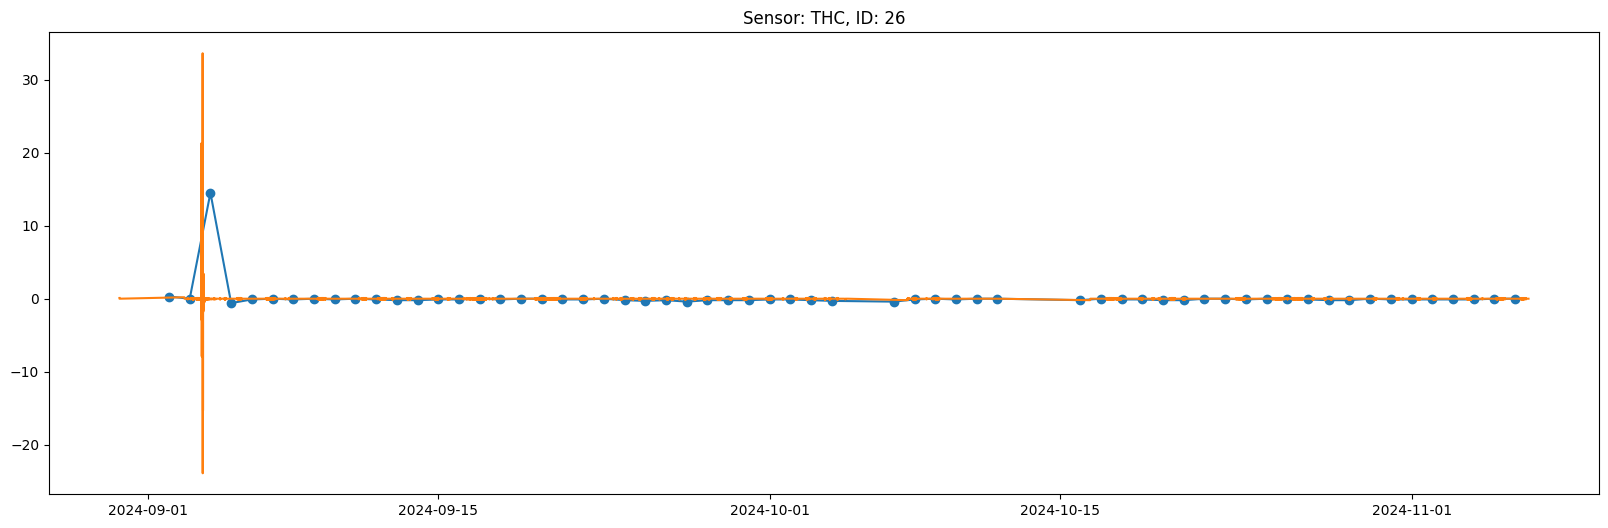

In [12]:
plot_diff(26)